# Scikit-neuromsi Tutorial

This tutorial is intended to serve as a guide for using `scikit-neuromsi` to implement neurocomputational models of multisensory integration.

## General imports

The first thing we will do is import the necessary libraries. In general you will need the following:

- skneuromsi (*skneuromsi*) is the library that we present in this tutorial.
- numpy (*numpy*) this library will allow you to perform numerical computations.
- matplotlib (*matplotlib.pyplot*) this librarly will allow you to visualise your results.

Note: In this tutorial we assume that you already have a basic knowledge of `numpy` and `matplotlib` for scientific computing.

In [1]:
from skneuromsi import core
import numpy as np
import matplotlib.pyplot as plt

## Implementation of the Alais and Burr bimodal integration model

To easily implement the model developed by Alais and Burr (2004) you can import the corresponding module and instatiate the `AlaisBurr2004` class: 

In [2]:
from skneuromsi.alais_burr2004 import AlaisBurr2004

model = AlaisBurr2004()
model

AlaisBurr2004(possible_locations=array([-20.  , -19.99, -19.98, ...,  19.97,  19.98,  19.99]), auditory_sigma=3.0, visual_sigma=3.0)

By calling the model you can explore its main built-in parameters:
- `possible_locations`: All the possible locations where the stimulus could be delivered (in degrees).
- `auditory_sigma`: Standard deviation of the auditory estimate.
- `visual_sigma`: Standard deviation of the visual estimate.

Now let's run the model for equidistant auditory and visual locations:

In [3]:
res = model.run(visual_location=-5, auditory_location=5)
res

{'auditory': array([1.10692781e-16, 1.13810052e-16, 1.17013810e-16, ...,
        5.20955703e-07, 5.12359295e-07, 5.03899139e-07]),
 'visual': array([4.95573172e-07, 5.03899139e-07, 5.12359295e-07, ...,
        1.20306417e-16, 1.17013810e-16, 1.13810052e-16]),
 'multisensory': array([9.38267850e-21, 9.80898311e-21, 1.02544291e-20, ...,
        1.07198655e-20, 1.02544291e-20, 9.80898311e-21])}

The model outputs three `numpy.arrays` containing the results of both unisensory estimators and the multisensory estimator. To make sense of our results, let's visualise the output:

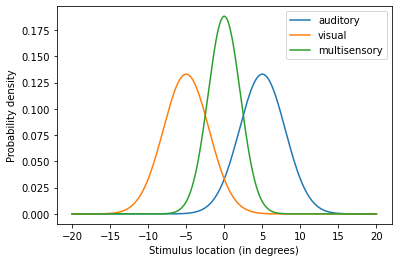

In [4]:
for k in res:
    plt.plot(model.possible_locations, res[k], label=k)
plt.legend()
plt.xlabel("Stimulus location (in degrees)")
plt.ylabel("Probability density")
plt.show()

The plot shows how both auditory and visual estimates are combined into a single multisensory estimate. Now let's try a different configuration of the model:

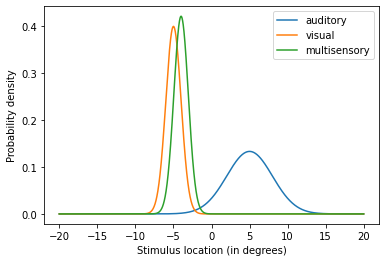

In [5]:
alter_model = AlaisBurr2004(visual_sigma=1, auditory_sigma=3)
alter_res = alter_model.run(visual_location=-5, auditory_location=5)

for k in res:
    plt.plot(alter_model.possible_locations, alter_res[k], label=k)
plt.legend()
plt.xlabel("Stimulus location (in degrees)")
plt.ylabel("Probability density")
plt.show()

In this new configuration we increased the precision of the visual estimate. By doing so, the multisensory estimate of the stimulus location is dramatically biased towards the visual estimate.

The opposite happens if we decrease the visual stimulus precision:

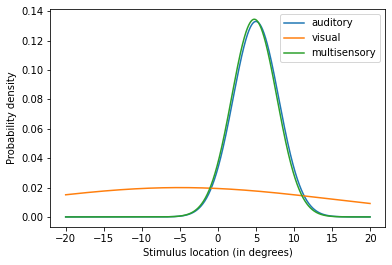

In [6]:
alter_model = AlaisBurr2004(visual_sigma=20, auditory_sigma=3)
alter_res = alter_model.run(visual_location=-5, auditory_location=5)

for k in res:
    plt.plot(alter_model.possible_locations, alter_res[k], label=k)
plt.legend()
plt.xlabel("Stimulus location (in degrees)")
plt.ylabel("Probability density")
plt.show()

By manipulating the precision of the unisensory estimates you've explored computationally the principles of the MLE estimation behind the model. Refer to the [documentation](https://scikit-neuromsi.readthedocs.io/en/latest/skneuromsi.html#skneuromsi-alais-burr2004-module) for further information about parameters to manipulate.

> This demonstration of the Alais and Burr model mechanics is inspired in the Computational Cognitive Neuroscience course materials developed by [Dr. Peggy Series](https://homepages.inf.ed.ac.uk/pseries/index.html) at The University of Edinburgh.  

## Implementation of the Ernst and Banks visual-haptic integrator model

As in the previous section, you can implement the model developed by Ernst and Banks (2002) by importing the corresponding module and instantiating the `ErnstBanks2002` class:

In [7]:
from skneuromsi.ernst_banks2002 import ErnstBanks2002

model = ErnstBanks2002()
model

ErnstBanks2002(possible_heights=array([49.  , 49.01, 49.02, ..., 60.97, 60.98, 60.99]), haptic_sigma=1, visual_sigma=1)

Let's run the model for two conflicting stimulus heights:

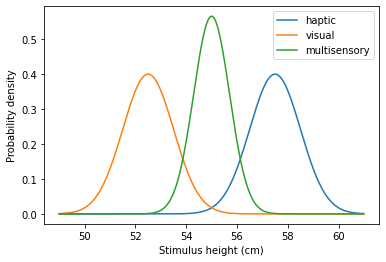

In [8]:
model = ErnstBanks2002()
res = model.run(visual_height=52.5, haptic_height=57.5)

for k in res:
    plt.plot(model.possible_heights, res[k], label=k)
plt.legend()
plt.xlabel("Stimulus height (cm)")
plt.ylabel("Probability density")
plt.show()

The model mechanics are the same as in the previous section. We'll leave its exploration to you!

## Implementation of the Kording Bayesian Causal Inference model

You can implement the model Causal Inference model developed by Kording et al (2002) by importing the corresponding module and instantiating the `Kording2007` class:

In [12]:
from skneuromsi.kording2007 import Kording2007
import matplotlib.pyplot as plt

model = Kording2007()
model

Kording2007(possible_locations=(array([-42.        , -40.28571429, -38.57142857, -36.85714286,
       -35.14285714, -33.42857143, -31.71428571, -30.        ,
       -28.28571429, -26.57142857, -24.85714286, -23.14285714,
       -21.42857143, -19.71428571, -18.        , -16.28571429,
       -14.57142857, -12.85714286, -11.14285714,  -9.42857143,
        -7.71428571,  -6.        ,  -4.28571429,  -2.57142857,
        -0.85714286,   0.85714286,   2.57142857,   4.28571429,
         6.        ,   7.71428571,   9.42857143,  11.14285714,
        12.85714286,  14.57142857,  16.28571429,  18.        ,
        19.71428571,  21.42857143,  23.14285714,  24.85714286,
        26.57142857,  28.28571429,  30.        ,  31.71428571,
        33.42857143,  35.14285714,  36.85714286,  38.57142857,
        40.28571429,  42.        ]), 1.7142857142857142), N=100000, auditory_sigma=2, auditory_var=4, visual_sigma=10, visual_var=100)

By calling the model you can observe its main built-in parameters. You can refer to the [documentation](https://scikit-neuromsi.readthedocs.io/en/latest/api.html#module-skneuromsi-kording2007) for more deatils about the available parameters.

Let's run the model for two conflicting stimulus locations:

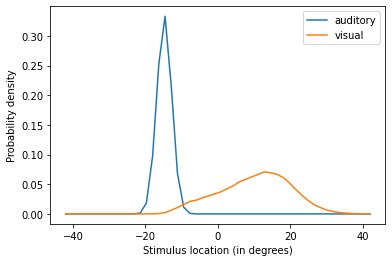

In [21]:
res = model.run(auditory_location=-15, visual_location=15)

for k in out:
    plt.plot(model.possible_locations[0], res[k], label=k)
plt.legend()
plt.xlabel("Stimulus location (in degrees)")
plt.ylabel("Probability density")
plt.show()

The model outputs the unisensory estimates as being apart and centered around the given locations (-15 and 15 for the auditory and visual modality respectively).

Now let's see what happens if we reduce the distance of the stimuli:

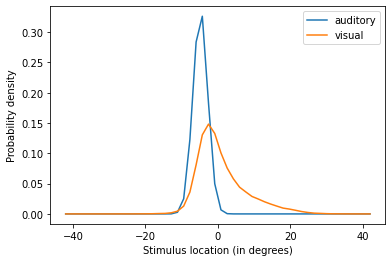

In [19]:
res = model.run(auditory_location=-5, visual_location=5)

for k in out:
    plt.plot(model.possible_locations[0], res[k], label=k)
plt.legend()
plt.xlabel("Stimulus location (in degrees)")
plt.ylabel("Probability density")
plt.show()

The model shows how the less precise stimulus location (in this case, visual) is biased towards the more precise one. This happens because the model is computing the unisensory estimates based on the probability of the stimuli originating from a common source. 

> This demonstration of the Bayesian Causal Inference model mechanics is inspired in the tutorial of the [BCIT Toolbox](https://github.com/multisensoryperceptionlab/BCIT/blob/master/Documentation/BCIT_Documentation_5.1.2017.pdf).

## Build your own scikit-neuromsi model!